In [302]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
import math
import pytz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# A first look at the data

# Question 1
Report the following statistics for each hashtag, i.e. each ﬁle:


In [706]:
#define function to report required terms for question 1
def readfile_q1(file_name):
    with open(file_name,encoding='utf8') as file:
        #Each line is a tweet info
        data=file.readlines()
    time_list=[]
    num_followers=[]
    num_retweets=[]
    for line in data:
        json_object=json.loads(line)
        time_list.append(json_object['citation_date'])#extract time a tweet is posted by
        num_followers.append(json_object['author']['followers'])#extract number of followers of teh person tweeting
        num_retweets.append(json_object['metrics']['citations']['total'])#extract number of retweets of a tweet
    file.close()
    date_list=[]
    pst_tz=pytz.timezone('America/Los_Angeles')#time info conversion
    for time in time_list:
        date=datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)#save converted time into a new list
    dataframe=pd.DataFrame(date_list,columns=['Date'])#generate a dataframe based on date
    dataframe=dataframe.set_index(dataframe['Date'])#set a date string as index
    #print(date_df)
    dataframe.drop(['Date'],'columns',inplace=True)#discard the second column
    dataframe['num_tweets']=1#initialize a new column and set the column name as num_tweets
    dataframe=dataframe.resample('H').count()#resample the dataframe by "hour" and save the count as entry
    return dataframe, num_followers,num_retweets

In [707]:
#gohawks
dataframe,num_followers,num_retweets=readfile_q1('tweets_#gohawks.txt')
print('For "gohawks" file, the statistical observations are')
print('The average number of tweets per hour is {}'.format(np.mean((dataframe['num_tweets']))))
print('The average number of followers is {}'.format(np.mean(num_followers)))
print('The average number of retweets is {}'.format(np.mean(num_retweets)))

For "gohawks" file, the statistical observations are
The average number of tweets per hour is 292.09326424870466
The average number of followers is 2217.9237355281984
The average number of retweets is 2.0132093991319877


In [55]:
#gopatriots
dataframe,num_followers,num_retweets=readfile_q1('tweets_#gopatriots.txt')
print('For "gopatriots" file, the statistical observations are')
print('The average number of tweets per hour is {}'.format(np.mean(dataframe['num_tweets'])))
print('The average number of followers is {}'.format(np.mean(num_followers)))
print('The average number of retweets is {}'.format(np.mean(num_retweets)))

For "gopatriots" file, the statistical observations are
The average number of tweets per hour is 40.888695652173915
The average number of followers is 1427.2526051635405
The average number of retweets is 1.4081919101697078


In [56]:
#nfl
dataframe,num_followers,num_retweets=readfile_q1('tweets_#nfl.txt')
print('For "nfl" file, the statistical observations are')
print('The average number of tweets per hour is {}'.format(np.mean(dataframe['num_tweets'])))
print('The average number of followers is {}'.format(np.mean(num_followers)))
print('The average number of retweets is {}'.format(np.mean(num_retweets)))

For "nfl" file, the statistical observations are
The average number of tweets per hour is 396.97103918228277
The average number of followers is 4662.37544523693
The average number of retweets is 1.5344602655543254


In [72]:
#patriots
dataframe,num_followers,num_retweets=readfile_q1('tweets_#patriots.txt')
print('For "patriots" file, the statistical observations are')
print('The average number of tweets per hour is {}'.format(np.mean(dataframe['num_tweets'])))
print('The average number of followers is {}'.format(np.mean(num_followers)))
print('The average number of retweets is {}'.format(np.mean(num_retweets)))

For "patriots" file, the statistical observations are
The average number of tweets per hour is 750.6320272572402
The average number of followers is 3280.4635616550277
The average number of retweets is 1.7852871288476946


In [74]:
#sb49
dataframe,num_followers,num_retweets=readfile_q1('tweets_#sb49.txt')
print('For "sb49" file, the statistical observations are')
print('The average number of tweets per hour is {}'.format(np.mean(dataframe['num_tweets'])))
print('The average number of followers is {}'.format(np.mean(num_followers)))
print('The average number of retweets is {}'.format(np.mean(num_retweets)))

For "sb49" file, the statistical observations are
The average number of tweets per hour is 1275.5557461406518
The average number of followers is 10374.160292019487
The average number of retweets is 2.52713444111402


In [75]:
#superbowl
dataframe,num_followers,num_retweets=readfile_q1('tweets_#superbowl.txt')
print('For "superbowl" file, the statistical observations are')
print('The average number of tweets per hour is {}'.format(np.mean(dataframe['num_tweets'])))
print('The average number of followers is {}'.format(np.mean(num_followers)))
print('The average number of retweets is {}'.format(np.mean(num_retweets)))

For "superbowl" file, the statistical observations are
The average number of tweets per hour is 2067.824531516184
The average number of followers is 8814.96799424623
The average number of retweets is 2.3911895819207736


# Question 2
Plot "number of tweets in hour" over time for SuperBowl and nfl (1-hour bins)

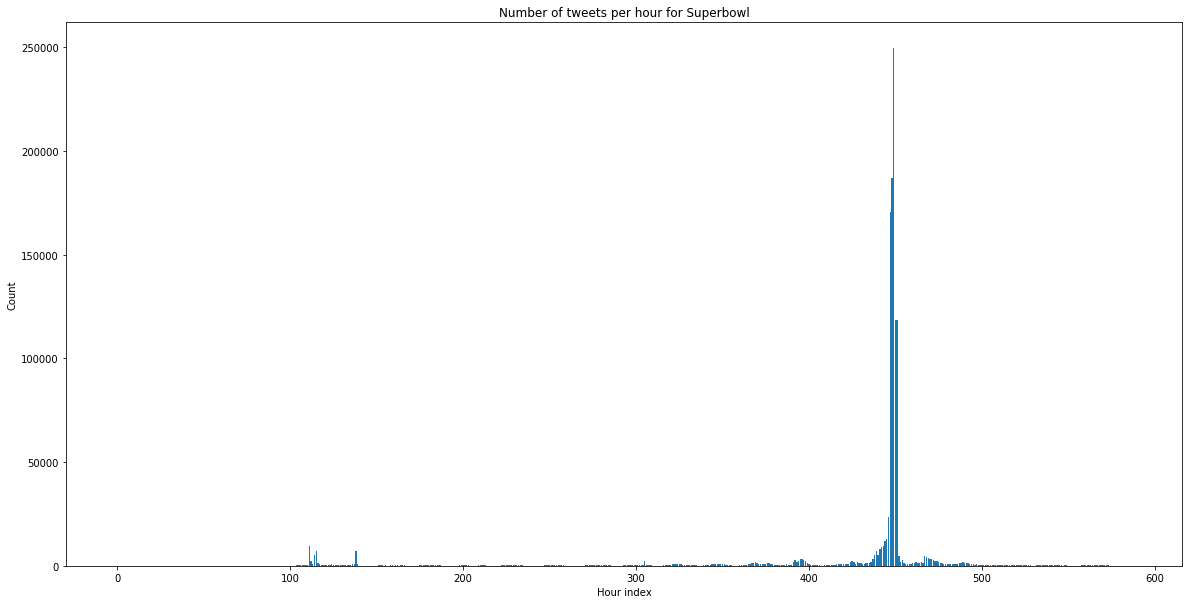

In [88]:
#superbowl (must run the previous one cell first)
count_array=(date_df['num_tweets']).array
plt.figure(figsize=(20,10))
plt.bar(range(len(count_array)),count_array)
plt.title('Number of tweets per hour for Superbowl')
plt.xlabel('Hour index')
plt.ylabel('Count')
plt.show()

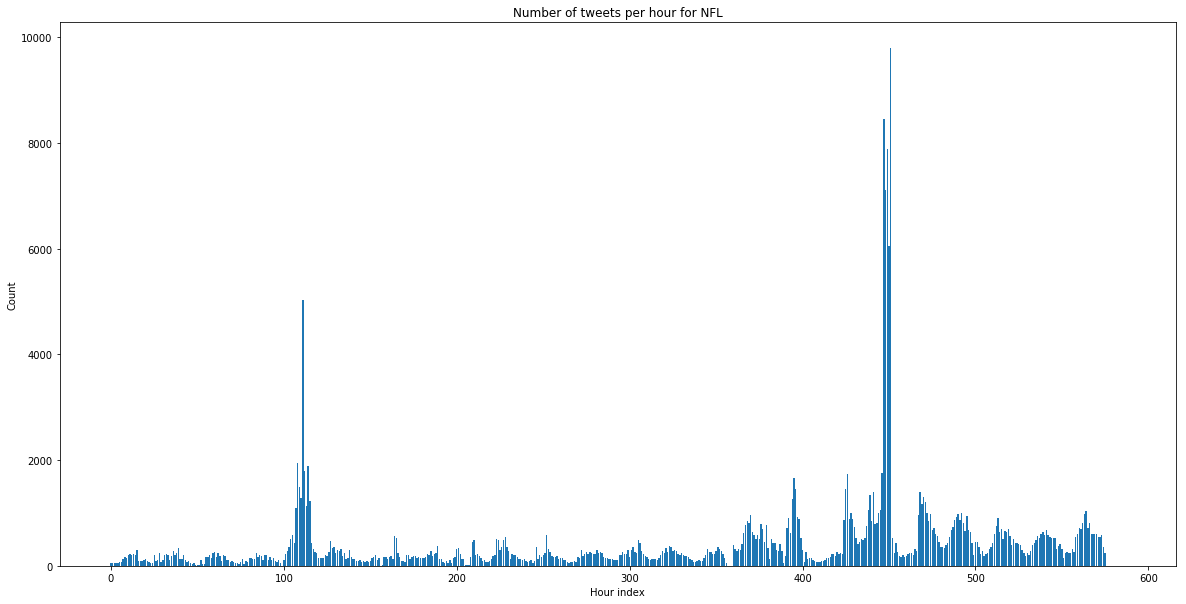

In [89]:
#nfl
date_df,num_followers,num_retweets=readfile_q1('tweets_#nfl.txt')
count_array=(date_df['num_tweets']).array
plt.figure(figsize=(20,10))
plt.bar(range(len(count_array)),count_array)
plt.title('Number of tweets per hour for NFL')
plt.xlabel('Hour index')
plt.ylabel('Count')
plt.show()